In [ ]:
import pandas as pd

In [ ]:
path = "/content/drive/MyDrive/"
cols = ['id', 'text', 'label', 'intensity']
anger = pd.read_csv(path + 'train_anger.txt', header=None, sep='\t', names=cols, index_col=0)
fear = pd.read_csv(path + 'train_fear.txt', header=None, sep='\t', names=cols, index_col=0)
sad = pd.read_csv(path + 'train_sadness.txt', header=None, sep='\t', names=cols, index_col=0)
joy = pd.read_csv(path + 'train_joy.txt', header=None, sep='\t', names=cols, index_col=0)

joy.head()

,text,label,intensity
id,,,
30000,Just got back from seeing @GaryDelaney in Burs...,joy,0.980
30001,Oh dear an evening of absolute hilarity I don'...,joy,0.958
30002,Been waiting all week for this game â¤ï¸â¤ï...,joy,0.940
30003,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,0.938
30004,I feel so blessed to work with the family that...,joy,0.938


In [ ]:
express = [anger, fear, sad, joy]
df_train = pd.concat(express)
df_train.reset_index(inplace=True)
df_train.label.value_counts()

fear       1147
anger       857
joy         823
sadness     786
Name: label, dtype: int64

In [ ]:
df_train.tail()

,id,text,label,intensity
3608,30818,It's just the lack of company and liveliness o...,joy,0.058
3609,30819,Quinn's short hair makes me sad. #glee,joy,0.040
3610,30820,hate overthinking e v e r y t h i n g like i j...,joy,0.040
3611,30821,People who cheer for sports teams completely o...,joy,0.020
3612,30822,@DamnPatriot You're a POS for rejoicing in som...,joy,0.019


In [ ]:
# import seaborn as sns
# colors = ['red', 'black', 'lightblue', 'yellow']
# bplot = sns.boxplot(data=df_train, x='label', y='intensity')
# for i in range(4):
#     bplot.artists[i].set_facecolor(colors[i])
# plt.title('Average Intensity for Each Label')



In [ ]:
from nltk.corpus import stopwords

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import string

In [ ]:
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer

In [ ]:
punctuations = string.punctuation
stopwords = stopwords.words("english")
total_stopwords = stopwords+list(punctuations)
total_stopwords.remove("not")

In [ ]:

def contractions(s):
 s = re.sub(r"won't", "will not",s)
 s = re.sub(r"would't", "would not",s)
 s = re.sub(r"could't", "could not",s)
 s = re.sub(r"\'d", "would",s)
 s = re.sub(r"can\'t", "can not",s)
 s = re.sub(r"n\'t", "not", s)
 s= re.sub(r"\'re", "are", s)
 s = re.sub(r"\'s", "is", s)
 s = re.sub(r"\"ll", "will", s)
 s = re.sub(r"\'t", "not", s)
 s = re.sub(r"\'ve", "have", s)
 s = re.sub(r"\'m", "am", s)
 s = re.sub("([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)"," ",s)
 s = re.sub("[^A-Za-z ]"," ",s)
 return s
df_train['text']=df_train['text'].apply(lambda x:contractions(x))

In [ ]:
lema = WordNetLemmatizer()
def clean_data(text):
    cleaned = []
    for headline in text:
        headlines = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"," ",headline)   #url
        headlines = re.sub("([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)"," ",headlines)       #email
        headlines = re.sub("[^A-Za-z ]"," ",headlines)
        headlines = headlines.lower()
        headlines = word_tokenize(headlines)
        # print(headlines)
        headlines = [lema.lemmatize(word) for word in headlines if word not in total_stopwords]
        cleaned.append(" ".join(headlines))
    return cleaned

In [ ]:
text = clean_data(df_train['text'])

In [ ]:
df_train.text = pd.DataFrame(text)
df_train.head()

,id,text,label,intensity
0,10000,fu k heck moved fridge knock landlord door ang...,anger,0.938
1,10001,indian uber driver called someone n word wasno...,anger,0.896
2,10002,dpd uk asked parcel delivered pick store not a...,anger,0.896
3,10003,ef whichever butt wipe pulled fire alarm davis...,anger,0.896
4,10004,donot join btcare put phone talk rude taking m...,anger,0.896


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df_train['label']= label_encoder.fit_transform(df_train['label'])

In [ ]:
df_train.tail()

,id,text,label,intensity
3608,30818,itis lack company liveliness make bored,2,0.058
3609,30819,quinnis short hair make sad glee,2,0.040
3610,30820,hate overthinking e v e r h n g like jus wan n...,2,0.040
3611,30821,people cheer sport team completely outside new...,2,0.020
3612,30822,damnpatriot youare po rejoicing someoneis death,2,0.019


In [ ]:
x_df_train = df_train.drop('intensity',axis=1)
x_df_train.shape

(3613, 3)

In [ ]:
y_df_train = df_train['intensity']
y_df_train.shape

(3613,)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer_tfidf = TfidfVectorizer(max_features=1000)
x_tfidf = vectorizer_tfidf.fit_transform(x_df_train['text'])
x_tfidf_df = pd.DataFrame.sparse.from_spmatrix(x_tfidf).join(x_df_train['label'])

In [ ]:
x_tfidf_df

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.407917,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2
3609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2
3610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2
3611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2


In [ ]:
x_tfidf_df.columns = x_tfidf_df.columns.astype(str)

In [ ]:
np_df=x_tfidf_df.to_numpy()
np_df.shape

(3613, 1001)

In [ ]:
np_df

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 2.]])

In [ ]:
y_tfidf=df_train['intensity']
y_tfidf

0       0.938
1       0.896
2       0.896
3       0.896
4       0.896
        ...  
3608    0.058
3609    0.040
3610    0.040
3611    0.020
3612    0.019
Name: intensity, Length: 3613, dtype: float64

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras
NB_CLASSES=3


model=tf.keras.models.Sequential()


model.add(keras.layers.Dense(128,
                           input_shape=(1001,),

                           activation='relu'))

model.add(keras.layers.Dense(128,
                           activation='relu'))


model.add(keras.layers.Dense(1,

                           activation='relu'))


model.compile(loss='mean_squared_error', optimizer='Adam')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               128256    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 144897 (566.00 KB)
Trainable params: 144897 (566.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import matplotlib.pyplot as plt

Epoch 1/10
181/181 [==============================] - 2s 5ms/step - loss: 0.0398 - val_loss: 0.0328
Epoch 2/10
181/181 [==============================] - 1s 5ms/step - loss: 0.0180 - val_loss: 0.0481
Epoch 3/10
181/181 [==============================] - 1s 5ms/step - loss: 0.0118 - val_loss: 0.0505
Epoch 4/10
181/181 [==============================] - 1s 5ms/step - loss: 0.0080 - val_loss: 0.0545
Epoch 5/10
181/181 [==============================] - 1s 6ms/step - loss: 0.0060 - val_loss: 0.0462
Epoch 6/10
181/181 [==============================] - 1s 5ms/step - loss: 0.0050 - val_loss: 0.0534
Epoch 7/10
181/181 [==============================] - 1s 7ms/step - loss: 0.0042 - val_loss: 0.0575
Epoch 8/10
181/181 [==============================] - 1s 7ms/step - loss: 0.0038 - val_loss: 0.0545
Epoch 9/10
181/181 [==============================] - 1s 8ms/step - loss: 0.0035 - val_loss: 0.0501
Epoch 10/10
181/181 [==============================] - 1s 7ms/step - loss: 0.0031 - val_loss: 0.0529

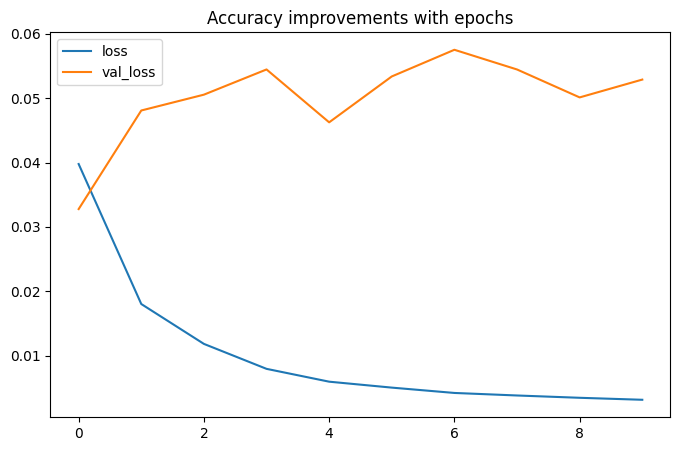

In [ ]:
VERBOSE=1
BATCH_SIZE=16
EPOCHS=10
VALIDATION_SPLIT=0.2

#fit model
history=model.fit(np_df,y_tfidf,batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.title('Accuracy improvements with epochs')
plt.show()

In [ ]:
# model.evaluate(x_test,y_test)

In [ ]:
path = "/content/drive/MyDrive/"
cols = ['id', 'text', 'label', 'intensity']
dev_anger = pd.read_csv(path + 'dev_anger.txt', header=None, sep='\t', names=cols, index_col=0)
dev_fear = pd.read_csv(path + 'dev_fear.txt', header=None, sep='\t', names=cols, index_col=0)
dev_sad = pd.read_csv(path + 'dev_sadness.txt', header=None, sep='\t', names=cols, index_col=0)
dev_joy = pd.read_csv(path + 'dev_joy.txt', header=None, sep='\t', names=cols, index_col=0)
dev_anger_intensity = pd.read_csv(path + 'dev_anger_intensity.txt', header=None, sep='\t', names=cols, index_col=0)
dev_fear_intensity = pd.read_csv(path + 'dev_fear_intensity.txt', header=None, sep='\t', names=cols, index_col=0)
dev_sad_intensity = pd.read_csv(path + 'dev_sadness_intensity.txt', header=None, sep='\t', names=cols, index_col=0)
dev_joy_intensity = pd.read_csv(path + 'dev_joy_intensity.txt', header=None, sep='\t', names=cols, index_col=0)

dev_joy.head()

,text,label,intensity
id,,,
30823,"@theclobra lol I thought maybe, couldn't decid...",joy,NONE
30824,Nawaz Sharif is getting more funnier than @kap...,joy,NONE
30825,Nawaz Sharif is getting more funnier than @kap...,joy,NONE
30826,@tomderivan73 ðŸ˜...I'll just people watch an...,joy,NONE
30827,I love my family so much #lucky #grateful #sma...,joy,NONE


In [ ]:
express = [dev_anger, dev_fear, dev_sad, dev_joy,dev_anger_intensity, dev_fear_intensity, dev_sad_intensity, dev_joy_intensity]
dev_df = pd.concat(express)
dev_df.reset_index(inplace=True)
dev_df.label.value_counts()

anger      844
fear       220
joy        158
sadness    148
Name: label, dtype: int64

In [ ]:
dev_df['text']=dev_df['text'].apply(lambda x:contractions(x))

In [ ]:
text = clean_data(dev_df['text'])

In [ ]:
dev_df.text = pd.DataFrame(text)

In [ ]:
dev_df['label']= label_encoder.fit_transform(dev_df['label'])

In [ ]:
dev_df

,id,text,label,intensity
0,10941,point today someone say something remotely kin...,0,NONE
1,10942,corningfootball game day minus relentless,0,NONE
2,10943,game pissed game year blood boiling time turn ...,0,NONE
3,10944,spamvicious ihave found itis candice not canda...,0,NONE
4,10945,moocowward mrsajhargreaves melly garybarlow no...,0,NONE
...,...,...,...,...
1365,30897,feel good get outside minute get fresh air iti...,2,0.58
1366,30898,r il ppl get triggered u smiling theyare irrel...,2,0.17
1367,30899,gigafag pipertownsend snapchat new would beg d...,2,0.396
1368,30900,gigafag pipertownsend snapchat new would beg d...,2,0.156


In [ ]:
x_dev_df = dev_df.drop('intensity',axis=1)
x_dev_df.shape

(1370, 3)

In [ ]:
x_dev_df

,id,text,label
0,10941,point today someone say something remotely kin...,0
1,10942,corningfootball game day minus relentless,0
2,10943,game pissed game year blood boiling time turn ...,0
3,10944,spamvicious ihave found itis candice not canda...,0
4,10945,moocowward mrsajhargreaves melly garybarlow no...,0
...,...,...,...
1365,30897,feel good get outside minute get fresh air iti...,2
1366,30898,r il ppl get triggered u smiling theyare irrel...,2
1367,30899,gigafag pipertownsend snapchat new would beg d...,2
1368,30900,gigafag pipertownsend snapchat new would beg d...,2


In [ ]:
y_dev_df = dev_df['intensity']
y_dev_df

0        NONE
1        NONE
2        NONE
3        NONE
4        NONE
        ...  
1365     0.58
1366     0.17
1367    0.396
1368    0.156
1369    0.704
Name: intensity, Length: 1370, dtype: object

In [ ]:
y_dev_df=pd.to_numeric(y_dev_df, errors='coerce').fillna(0)
y_dev_df

0       0.000
1       0.000
2       0.000
3       0.000
4       0.000
        ...  
1365    0.580
1366    0.170
1367    0.396
1368    0.156
1369    0.704
Name: intensity, Length: 1370, dtype: float64

In [ ]:
vectorizer_tfidf = TfidfVectorizer(max_features=1000)
x_dev_df_tfidf = vectorizer_tfidf.fit_transform(x_dev_df['text'])
x_dev_df_tfidf_df = pd.DataFrame.sparse.from_spmatrix(x_dev_df_tfidf).join(x_dev_df['label'])

In [ ]:
x_dev_df_tfidf_df.columns = x_dev_df_tfidf_df.columns.astype(str)
x_dev_df_tfidf_np = x_dev_df_tfidf_df.to_numpy()
x_dev_df_tfidf_np

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 2.]])

In [ ]:
x_dev_df_tfidf_np.shape

(1370, 1001)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [ ]:
def get_score(y_test, y_pred, name):
    print(name + '\n')
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
    return mean_absolute_error(y_test, y_pred),mean_squared_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
model.predict(x_dev_df_tfidf_np)

43/43 [==============================] - 0s 2ms/step


array([[0.42949018],
       [0.3130091 ],
       [0.33873415],
       ...,
       [0.5379284 ],
       [0.56636375],
       [0.3705632 ]], dtype=float32)

In [ ]:
get_score(y_dev_df,model.predict(x_dev_df_tfidf_np),'ANN')


43/43 [==============================] - 0s 2ms/step
ANN

Mean Absolute Error: 0.38404053596327775
Mean Squared Error: 0.1776998667892683
Root Mean Squared Error: 0.4215446201640679


(0.38404053596327775, 0.1776998667892683, 0.4215446201640679)

In [ ]:
y_actual = y_dev_df
y_predicted = model.predict(x_dev_df_tfidf_np).flatten()
print(y_predicted)

pd.DataFrame(data={"Actual Intensity" : y_actual, "Predicted Intensity" : y_predicted})

43/43 [==============================] - 0s 7ms/step
[0.42949018 0.3130091  0.33873415 ... 0.5379284  0.56636375 0.3705632 ]


,Actual Intensity,Predicted Intensity
0,0.000,0.429490
1,0.000,0.313009
2,0.000,0.338734
3,0.000,0.320670
4,0.000,0.472371
...,...,...
1365,0.580,0.692392
1366,0.170,0.753890
1367,0.396,0.537928
1368,0.156,0.566364


In [ ]:
combined_df = pd.concat([df_train, dev_df]).reset_index()
combined_df.shape

(4983, 5)

In [ ]:
combined_df.isna().sum()

index        0
id           0
text         0
label        0
intensity    0
dtype: int64

In [ ]:
combined_df['intensity']=pd.to_numeric(combined_df['intensity'], errors='coerce').fillna(0)
combined_df

,index,id,text,label,intensity
0,0,10000,fu k heck moved fridge knock landlord door ang...,0,0.938
1,1,10001,indian uber driver called someone n word wasno...,0,0.896
2,2,10002,dpd uk asked parcel delivered pick store not a...,0,0.896
3,3,10003,ef whichever butt wipe pulled fire alarm davis...,0,0.896
4,4,10004,donot join btcare put phone talk rude taking m...,0,0.896
...,...,...,...,...,...
4978,1365,30897,feel good get outside minute get fresh air iti...,2,0.580
4979,1366,30898,r il ppl get triggered u smiling theyare irrel...,2,0.170
4980,1367,30899,gigafag pipertownsend snapchat new would beg d...,2,0.396
4981,1368,30900,gigafag pipertownsend snapchat new would beg d...,2,0.156


In [ ]:
anger = combined_df.loc[combined_df['label']==0]
x_anger = anger.drop('intensity',axis=1)
anger['label']=pd.to_numeric(anger['label'], errors='coerce').fillna(0)

<ipython-input-73-85e2ed6b34d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anger['label']=pd.to_numeric(anger['label'], errors='coerce').fillna(0)


,index,id,text,label,intensity
0,0,10000,fu k heck moved fridge knock landlord door ang...,0,0.938
1,1,10001,indian uber driver called someone n word wasno...,0,0.896
2,2,10002,dpd uk asked parcel delivered pick store not a...,0,0.896
3,3,10003,ef whichever butt wipe pulled fire alarm davis...,0,0.896
4,4,10004,donot join btcare put phone talk rude taking m...,0,0.896
...,...,...,...,...,...
4715,1102,10936,jen ny people always get offended everyoneis s...,0,0.562
4716,1103,10937,gayla week try not let anger seep review resen...,0,0.625
4717,1104,10938,hope hustle donot offend nobody,0,0.292
4718,1105,10939,watched django unchained people may frown titt...,0,0.229


In [ ]:
anger_vectorizer = TfidfVectorizer(max_features=1000)
x_anger_tfidf = anger_vectorizer.fit_transform(x_anger['text'])
x_anger_tdidf_df = pd.DataFrame.sparse.from_spmatrix(x_anger_tfidf).join(anger['label'])
x_anger_tdidf_df.columns = x_anger_tdidf_df.columns.astype(str)
y_anger_intensity = anger['intensity']
np_df_anger=x_anger_tdidf_df.to_numpy()

In [ ]:
a= pd.DataFrame.sparse.from_spmatrix(x_anger_tfidf)
a

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.429247,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.441033,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1697,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1698,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1699,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_anger_tdidf_df

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,label
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.429247,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.441033,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1697,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1698,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1699,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:

#Anger_model
anger_model=tf.keras.models.Sequential()
anger_model.add(keras.layers.Dense(128,
                          input_shape=(1001,),
                          activation='relu'))
anger_model.add(keras.layers.Dense(128,
                          activation='relu'))
anger_model.add(keras.layers.Dense(1,
                          activation='relu'))
anger_model.compile(loss='mean_squared_error', optimizer='Adam')
anger_model.summary()

In [ ]:


fear_model=tf.keras.models.Sequential()
fear_model.add(keras.layers.Dense(128,
                          input_shape=(1001,),

                          activation='relu'))
fear_model.add(keras.layers.Dense(128,
                          activation='relu'))
fear_model.add(keras.layers.Dense(1,
                          #name='outlput_layer',
                          activation='relu'))
fear_model.compile(loss='mean_squared_error', optimizer='Adam')
fear_model.summary()

sad_model=tf.keras.models.Sequential()
sad_model.add(keras.layers.Dense(128,
                          input_shape=(1001,),

                          activation='relu'))
sad_model.add(keras.layers.Dense(128,
                          activation='relu'))
sad_model.add(keras.layers.Dense(1,
                          #name='outlput_layer',
                          activation='relu'))
sad_model.compile(loss='mean_squared_error', optimizer='Adam')
sad_model.summary()

joy_model=tf.keras.models.Sequential()
joy_model.add(keras.layers.Dense(128,
                          input_shape=(1001,),

                          activation='relu'))
joy_model.add(keras.layers.Dense(128,
                          activation='relu'))
joy_model.add(keras.layers.Dense(1,
                          #name='outlput_layer',
                          activation='relu'))
joy_model.compile(loss='mean_squared_error', optimizer='Adam')
joy_model.summary()

In [ ]:
anger = combined_df.loc[combined_df['label']==0]
anger_vectorizer = TfidfVectorizer(max_features=1000)
x_anger = anger_vectorizer.fit_transform(anger['text'])
x_anger_df = pd.DataFrame.sparse.from_spmatrix(x_anger).join(anger['label'])
y_intensity = anger['intensity']
np_df_anger=x_anger_df.to_numpy()
anger_model_history = anger_model.fit(np_df_anger, y_intensity)

54/54 [==============================] - 1s 8ms/step - loss: nan


In [ ]:
vectorizer_tfidf = TfidfVectorizer(max_features=1000)
x_dev_df_tfidf = vectorizer_tfidf.fit_transform(x_dev_df['text'])
x_dev_df_tfidf_df = pd.DataFrame.sparse.from_spmatrix(x_dev_df_tfidf).join(x_dev_df['label'])

In [ ]:
anger = combined_df.loc[combined_df['label']==0]
anger_vectorizer = TfidfVectorizer(max_features=1000)
x_anger = anger_vectorizer.fit_transform(anger['text'])
x_anger_df = pd.DataFrame.sparse.from_spmatrix(x_anger).join(anger['label'])
np_df_anger=x_anger_df.to_numpy()
y_intensity = anger['intensity']
anger_model_history = anger_model.fit(np_df_anger, y_intensity)

#FEAR
fear = combined_df.loc[combined_df['label']==1]
fear_vectorizer = TfidfVectorizer(max_features=1000)
x_fear = fear_vectorizer.fit_transform(fear['text'])
x_fear_df = pd.DataFrame.sparse.from_spmatrix(x_fear).join(fear['label'])
np_df_fear=x_fear_df.to_numpy()
y_intensity_fear=fear['intensity']
fear_model_history = fear_model.fit(np_df_fear, y_intensity_fear)

#SADNESS
sad = combined_df.loc[combined_df['label']==3]
sad_vectorizer = TfidfVectorizer(max_features=1000)
x_sad = sad_vectorizer.fit_transform(sad['text'])
x_sad_df = pd.DataFrame.sparse.from_spmatrix(x_sad).join(sad['label'])
np_df_sad=x_sad_df.to_numpy()
y_intensity_sad=sad['intensity']
sad_model_history = sad_model.fit(np_df_sad, y_intensity_sad)

#JOY
joy = combined_df.loc[combined_df['label']==2]
joy_vectorizer = TfidfVectorizer(max_features=1000)
x_joy = joy_vectorizer.fit_transform(joy['text'])
x_joy_df = pd.DataFrame.sparse.from_spmatrix(x_joy).join(joy['label'])
np_df_joy=x_joy_df.to_numpy()
y_intensity_joy=joy['intensity']
joy_model_history = joy_model.fit(np_df_joy, y_intensity_joy)

31/31 [==============================] - 1s 5ms/step - loss: nan


In [ ]:
cols = ["id", "text", "label", "intensity"]
anger_test = pd.read_csv(path + "test_anger.txt", header=None, sep="\t", names=cols, index_col=0)
fear_test = pd.read_csv(path + "test_fear.txt", header=None, sep="\t", names=cols, index_col=0)
sad_test = pd.read_csv(path + "test_sadness.txt", header=None, sep="\t", names=cols, index_col=0)
joy_test = pd.read_csv(path + "test_joy.txt", header=None, sep="\t", names=cols, index_col=0)
anger_test_intensity = pd.read_csv(path + "test_anger_intensity.txt", header=None, sep="\t", names=cols, index_col=0)
fear_test_intensity = pd.read_csv(path + "test_fear_intensity.txt", header=None, sep="\t", names=cols, index_col=0)
sad_test_intensity = pd.read_csv(path + "test_sadness_intensity.txt", header=None, sep="\t", names=cols, index_col=0)
joy_test_intensity = pd.read_csv(path + "test_joy_intensity.txt", header=None, sep="\t", names=cols, index_col=0)

anger_test_intensity.head()

,text,label,intensity
id,,,
10941,At the point today where if someone says somet...,anger,NONE
10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,NONE
10943,This game has pissed me off more than any othe...,anger,NONE
10944,@spamvicious I've just found out it's Candice ...,anger,NONE
10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,NONE


In [ ]:
w_intensity = [anger_test,fear_test,sad_test,joy_test,anger_test_intensity,fear_test_intensity,sad_test_intensity,joy_test_intensity]
for i in w_intensity:
  i['intensity']=pd.to_numeric(i['intensity'], errors='coerce').fillna(0)
  text = clean_data(i['text'])
  i['text']=i['text'].apply(lambda x:contractions(x))


In [ ]:
express = [anger_test,anger_test_intensity]
df_test_anger = pd.concat(express)
df_test_anger.reset_index(inplace=True)
df_test_anger.label.value_counts()

anger    1520
Name: label, dtype: int64

In [ ]:
df_test_anger

,id,text,label,intensity
0,10941,At the point today where if someone says somet...,anger,0.0
1,10942,CorningFootball IT S GAME DAY T MIN...,anger,0.0
2,10943,This game has pissed me off more than any othe...,anger,0.0
3,10944,spamvicious Ihave just found out itis Candice...,anger,0.0
4,10945,moocowward mrsajhargreaves Melly GaryBar...,anger,0.0
...,...,...,...,...
1515,11696,ggreenwald What if the supposed animosity is ...,anger,0.0
1516,11697,Will BYUis offense score vs WVU,anger,0.0
1517,11698,Id love c Gyimah in action but his coach is ...,anger,0.0
1518,11699,Forgiving means operating with Godis spirit a...,anger,0.0


In [ ]:
df_test_anger['label'] = label_encoder.fit_transform(df_test_anger['label'])
df_test_anger

,id,text,label,intensity
0,10941,At the point today where if someone says somet...,0,0.0
1,10942,CorningFootball IT S GAME DAY T MIN...,0,0.0
2,10943,This game has pissed me off more than any othe...,0,0.0
3,10944,spamvicious Ihave just found out itis Candice...,0,0.0
4,10945,moocowward mrsajhargreaves Melly GaryBar...,0,0.0
...,...,...,...,...
1515,11696,ggreenwald What if the supposed animosity is ...,0,0.0
1516,11697,Will BYUis offense score vs WVU,0,0.0
1517,11698,Id love c Gyimah in action but his coach is ...,0,0.0
1518,11699,Forgiving means operating with Godis spirit a...,0,0.0


In [ ]:
express = [fear_test,fear_test_intensity]
df_test_fear = pd.concat(express)
df_test_fear.reset_index(inplace=True)
df_test_fear.label.value_counts()
df_test_fear['label'] = label_encoder.fit_transform(df_test_fear['label'])
df_test_fear['intensity'] = pd.to_numeric(df_test_fear['intensity'], errors='coerce').fillna(0)

In [ ]:
express = [sad_test,sad_test_intensity]
df_test_sad = pd.concat(express)
df_test_sad.reset_index(inplace=True)
df_test_sad.label.value_counts()
df_test_sad['label'] = label_encoder.fit_transform(df_test_sad['label'])
df_test_sad['intensity'] = pd.to_numeric(df_test_sad['intensity'], errors='coerce').fillna(0)

In [ ]:
express = [joy_test,joy_test_intensity]
df_test_joy = pd.concat(express)
df_test_joy.reset_index(inplace=True)
df_test_joy.label.value_counts()
df_test_joy['label'] = label_encoder.fit_transform(df_test_joy['label'])
df_test_joy['intensity'] = pd.to_numeric(df_test_joy['intensity'], errors='coerce').fillna(0)

In [ ]:
df_test_anger['intensity'] = pd.to_numeric(df_test_anger['intensity'], errors='coerce').fillna(0)

In [ ]:
# X_anger_test = df_test_anger.drop(['intensity'],axis=1)
# Y_anger_actual = df_test_anger['intensity']

In [ ]:
#ANGER
X_anger_test = anger_vectorizer.transform(df_test_anger['text'])
x_anger_test_df = pd.DataFrame.sparse.from_spmatrix(X_anger_test).join(df_test_anger['label'])
np_anger_test=x_anger_test_df.to_numpy()
Y_anger_actual=tf.keras.utils.to_categorical(df_test_anger['intensity'],4)
Y_anger_predicted = anger_model.predict(x_anger_test_df)

#FEAR
X_fear_test = fear_vectorizer.transform(df_test_fear['text'])
x_fear_test_df = pd.DataFrame.sparse.from_spmatrix(X_fear_test).join(df_test_fear['label'])
np_fear_test=x_fear_test_df.to_numpy()
Y_fear_actual=tf.keras.utils.to_categorical(df_test_fear['intensity'],4)
Y_fear_predicted = fear_model.predict(np_fear_test)

#SADNESS
X_sad_test = sad_vectorizer.transform(df_test_sad['text'])
x_sad_test_df = pd.DataFrame.sparse.from_spmatrix(X_sad_test).join(df_test_sad['label'])
np_sad_test=x_sad_test_df.to_numpy()
Y_sad_actual=tf.keras.utils.to_categorical(df_test_sad['intensity'],4)
Y_sad_predicted = sad_model.predict(np_sad_test)

#JOY
X_joy_test = joy_vectorizer.transform(df_test_joy['text'])
x_joy_test_df = pd.DataFrame.sparse.from_spmatrix(X_joy_test).join(df_test_joy['label'])
np_joy_test=x_joy_test_df.to_numpy()
Y_joy_actual=tf.keras.utils.to_categorical(df_test_joy['intensity'],4)
Y_joy_predicted = joy_model.predict(np_joy_test)

45/45 [==============================] - 0s 2ms/step


In [ ]:
Y_joy_predicted

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [ ]:
get_score(Y_anger_actual, Y_anger_predicted, "Result of Anger Model")
get_score(Y_fear_actual, Y_fear_predicted, "Result of Fear Model")
get_score(Y_sad_actual, Y_sad_predicted, "Result of Sadness Model")
get_score(Y_joy_actual, Y_joy_predicted, "Result of Joy Model")

Result of Anger Model



ValueError: ignored

In [ ]:
import scipy

In [ ]:
def evaluate(pred,gold):
    gold_scores=[]
    pred_scores=[]
    gold_scores_range_05_1=[]
    pred_scores_range_05_1=[]
    for p in pred:
        pred_scores.append(p)
    for g in gold:
        gold_scores.append(g)
    for i in range(len(gold_scores)):
        if gold_scores[i] >= 0.5:
            gold_scores_range_05_1.append(gold_scores[i])
            pred_scores_range_05_1.append(pred_scores[i])

    if np.std(pred_scores)==0 or np.std(gold_scores)==0:
        return (0,0,0,0)

    pears_corr=scipy.stats.pearsonr(pred_scores,gold_scores)[0]
    pears_corr_range_05_1=scipy.stats.pearsonr(pred_scores_range_05_1,gold_scores_range_05_1)[0]

    return (pears_corr,pears_corr_range_05_1)

In [ ]:
pear_results=[]
spear_results=[]
pear_results_range_05_1=[]
spear_results_range_05_1=[]

num_pairs = 4
argv = ["Anger_Actual", Y_anger_actual, "Anger_Predicted", Y_anger_predicted, "Fear_Actual", Y_fear_actual, "Fear_Predicted", Y_fear_predicted, "Sad_Actual", Y_sad_actual, "Sad_Predicted", Y_sad_predicted, "Joy_Actual", Y_joy_actual, "Joy_Predicted", Y_joy_predicted]

for i in range(0,len(argv),4):
    name_gold = argv[i]
    gold=argv[i+1]
    name_pred = argv[i+2]
    pred=argv[i+3]
    result=evaluate(pred,gold)
    print ("Pearson correlation between ", name_pred, " and ", name_gold, ":\t", str(result[0]))
    pear_results.append(result[0])
    print ("Pearson correlation for gold scores in range 0.5-1 between ",name_pred," and ",name_gold,":\t",str(result[1]))
    pear_results_range_05_1.append(result[1])

avg_pear=np.mean(pear_results)

avg_pear_range_05_1=np.mean(pear_results_range_05_1)

print ("Average Pearson correlation:\t",str(avg_pear))

print ("Average Pearson correlation for gold scores in range 0.5-1:\t", str(avg_pear_range_05_1))

Pearson correlation between  Anger_Predicted  and  Anger_Actual :	 0
Pearson correlation for gold scores in range 0.5-1 between  Anger_Predicted  and  Anger_Actual :	 0
Pearson correlation between  Fear_Predicted  and  Fear_Actual :	 0.18564979466709902
Pearson correlation for gold scores in range 0.5-1 between  Fear_Predicted  and  Fear_Actual :	 0.44959089209444586
Pearson correlation between  Sad_Predicted  and  Sad_Actual :	 0.45816155345275206
Pearson correlation for gold scores in range 0.5-1 between  Sad_Predicted  and  Sad_Actual :	 0.4210432978823117
Pearson correlation between  Joy_Predicted  and  Joy_Actual :	 0.18755002061283035
Pearson correlation for gold scores in range 0.5-1 between  Joy_Predicted  and  Joy_Actual :	 0.31388824299174056
Average Pearson correlation:	 0.20784034218317035
Average Pearson correlation for gold scores in range 0.5-1:	 0.29613060824212456
